<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [3]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [5]:
# Load the dataset from the given URL
# file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv('survey_data_clean.csv')

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Unknown,Unknown,86155.287263,Unknown
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.000000,Unknown,Unknown,86155.287263,Unknown
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Appropriate in length,Easy,86155.287263,Unknown
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too long,Easy,86155.287263,Unknown
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too short,Easy,86155.287263,Unknown


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


You're calculating the logarithm to the base 10 of a number. This answers the question:

    “10 raised to what power gives me this number?”

For example:

    np.log10(1000) → 3 → because 103=1000103=1000

    np.log10(100) → 2

    np.log10(10) → 1

    np.log10(1) → 0

So:

np.log10(x)

shrinks large values (like salaries) into a smaller, more manageable scale — that's especially useful when some values are tens of thousands and others are millions.

And remember: we use if x > 0 else np.nan to avoid invalid results, because:

    log10(0) → undefined

    log10(negative number) → also undefined in real numbers

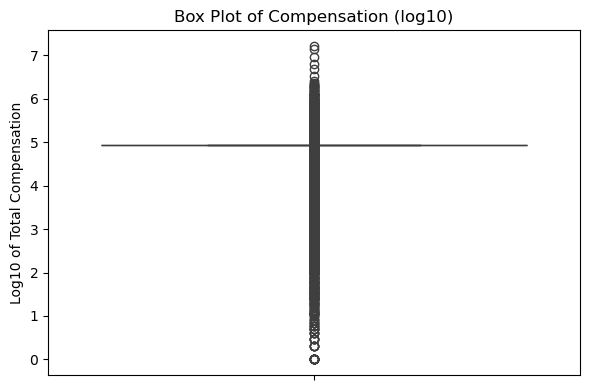

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Optional: log-transform to reduce skewness
df['CompTotal_log'] = df['ConvertedCompYearly'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

plt.figure(figsize=(6, 4))
sns.boxplot(y='CompTotal_log', data=df)

plt.title('Box Plot of Compensation (log10)')
plt.ylabel('Log10 of Total Compensation')
plt.tight_layout()
plt.show()

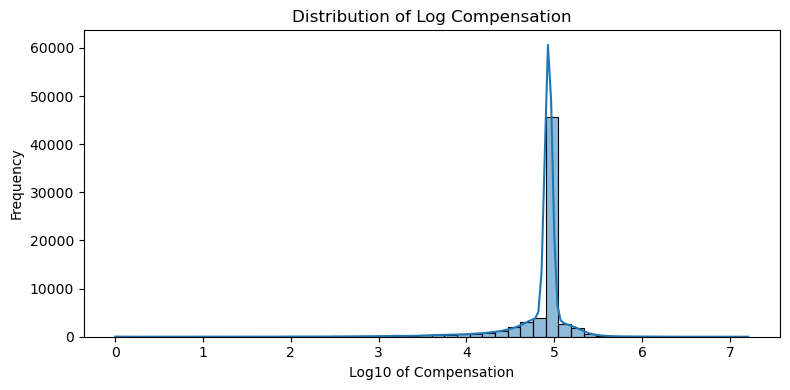

In [10]:
# Use a histogram to see where the values are clustered:

plt.figure(figsize=(8, 4))
sns.histplot(df['CompTotal_log'].dropna(), bins=50, kde=True)
plt.title("Distribution of Log Compensation")
plt.xlabel("Log10 of Compensation")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [13]:
## Write your code here
# Filter rows where "Employed, full-time" is one of the employment types
full_time_df = df[df['Employment'].str.contains("Employed, full-time", na=False)]
mean_comp = full_time_df['ConvertedCompYearly'].mean()
mean_comp

86722.42386666565

<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



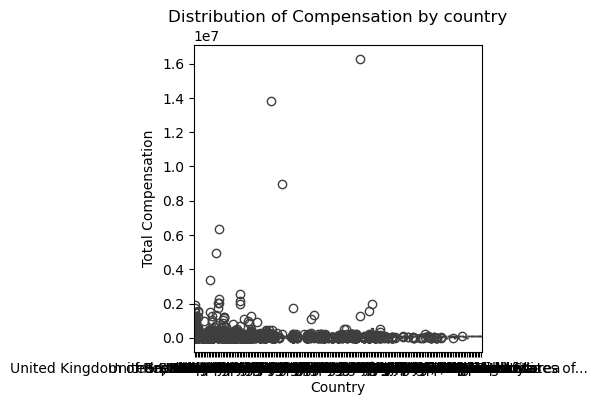

In [16]:
## Write your code here
region_map = {
    'North America': [
        'United States', 'Canada', 'Mexico'
    ],
    'South America': [
        'Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela', 'Uruguay', 'Paraguay', 'Ecuador', 'Bolivia'
    ],
    'Europe': [
        'Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 'Netherlands', 'Poland', 'Sweden', 'Norway',
        'Finland', 'Denmark', 'Portugal', 'Belgium', 'Austria', 'Switzerland', 'Ireland', 'Czech Republic',
        'Greece', 'Hungary', 'Ukraine', 'Romania', 'Slovakia', 'Croatia', 'Bulgaria', 'Serbia'
    ],
    'Asia': [
        'India', 'China', 'Japan', 'South Korea', 'Vietnam', 'Philippines', 'Pakistan', 'Indonesia', 'Thailand',
        'Bangladesh', 'Singapore', 'Malaysia', 'Nepal', 'Sri Lanka', 'Kazakhstan'
    ],
    'Middle East': [
        'Turkey', 'Israel', 'Saudi Arabia', 'United Arab Emirates', 'Iran', 'Iraq', 'Qatar', 'Lebanon', 'Jordan'
    ],
    'Africa': [
        'Nigeria', 'Egypt', 'South Africa', 'Kenya', 'Morocco', 'Ghana', 'Algeria', 'Tunisia', 'Ethiopia'
    ],
    'Oceania': [
        'Australia', 'New Zealand', 'Fiji', 'Papua New Guinea'
    ],
    'Other': [
        'I do not wish to disclose', 'Other country'
    ]
}


df['Region'] = df['Country'].map(region_map)
# Basic box plot for just one variable
plt.figure(figsize=(6, 4))
sns.boxplot(x='Country',y='ConvertedCompYearly', data=df)  # y-axis only since there's no category

# Add labels and title
plt.title('Distribution of Compensation by country')
plt.ylabel('Total Compensation')

# Show plot
plt.tight_layout()
plt.show()

In [17]:
# Get all unique countries in your data
unique_countries = df['Country'].dropna().unique()

# Base region mapping
base_map = {
    'North America': ['United States', 'Canada', 'Mexico'],
    'South America': ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru'],
    'Europe': ['Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 'Netherlands', 'Poland',
               'Sweden', 'Russia', 'Ukraine', 'Switzerland', 'Norway', 'Austria', 'Belgium',
               'Denmark', 'Finland', 'Ireland', 'Portugal', 'Czech Republic', 'Hungary', 'Greece', 'Romania'],
    'Asia': ['India', 'China', 'Japan', 'South Korea', 'Indonesia', 'Pakistan', 'Bangladesh',
             'Vietnam', 'Philippines', 'Thailand', 'Turkey', 'Singapore', 'Malaysia', 'Sri Lanka', 'Nepal'],
    'Africa': ['Nigeria', 'South Africa', 'Egypt', 'Kenya', 'Morocco', 'Algeria', 'Ghana', 'Ethiopia', 'Tanzania'],
    'Oceania': ['Australia', 'New Zealand'],
    'Middle East': ['Iran', 'Iraq', 'Israel', 'Saudi Arabia', 'United Arab Emirates',
                    'Jordan', 'Lebanon', 'Qatar']
}

# Build full region_map with default 'Other'
region_map = {}
for region, countries in base_map.items():
    for country in countries:
        region_map[country] = region

# Fill in any missing countries from your dataset as 'Other'
for country in unique_countries:
    if country not in region_map:
        region_map[country] = 'Other'

# Assign the new 'Region' column
df['Region'] = df['Country'].map(region_map)
df['Region'].head()


0            Other
1            Other
2            Other
3    North America
4           Europe
Name: Region, dtype: object

In [18]:
ConvertedCompYearly_counts = df.groupby(['Region', 'ConvertedCompYearly']).size().reset_index(name='Count')

C:\Users\serge\AppData\Local\Temp\ipykernel_8156\883570857.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_ConvertedCompYearly_counts = ConvertedCompYearly_counts.groupby('Region').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)


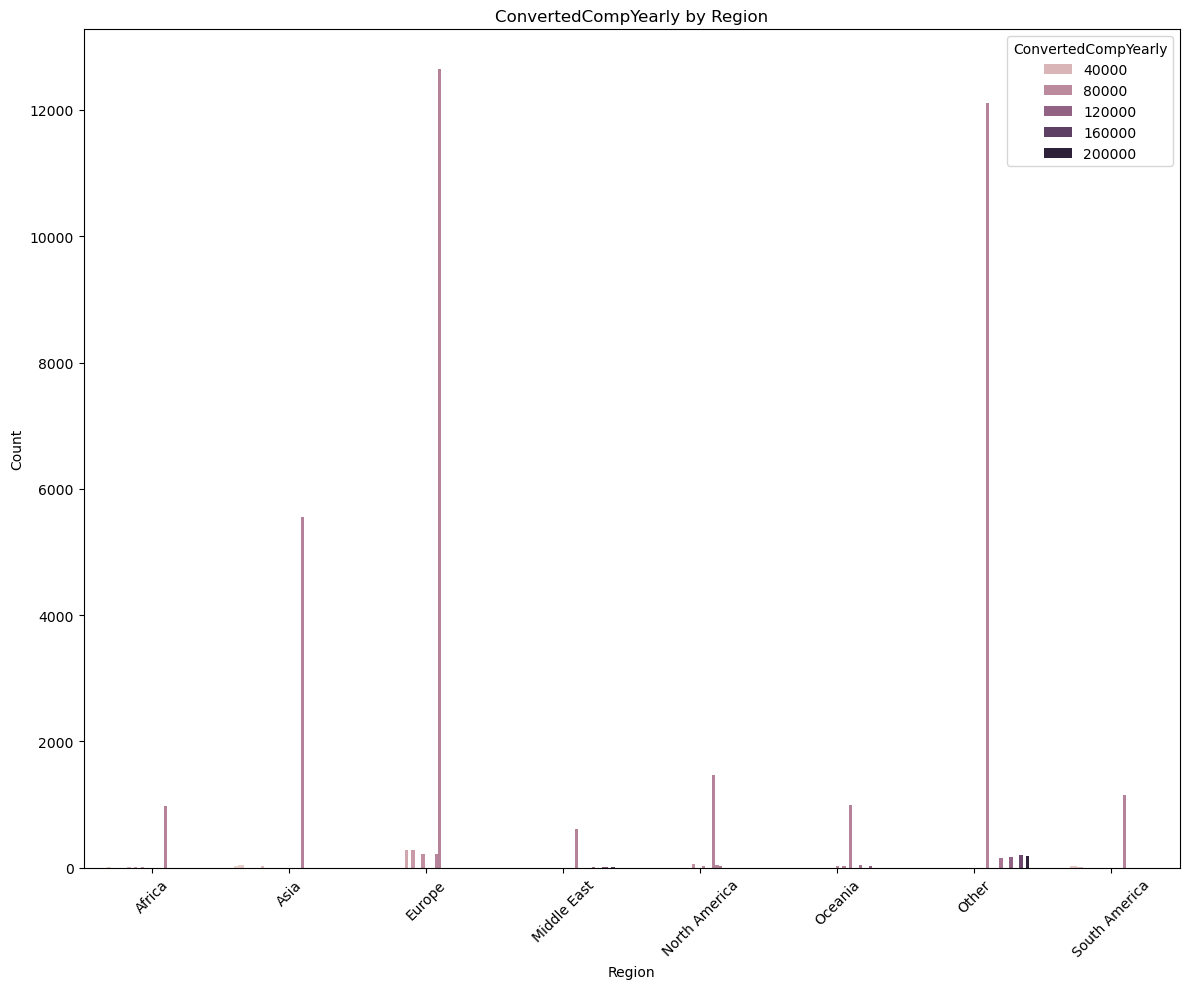

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

top_ConvertedCompYearly_counts = ConvertedCompYearly_counts.groupby('Region').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

plt.figure(figsize=(12, 10))
sns.barplot(data=top_ConvertedCompYearly_counts, x='Region', y='Count', hue='ConvertedCompYearly')
plt.title("ConvertedCompYearly by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [33]:
## Write your code here

ConvertedCompYearly_mean = df['ConvertedCompYearly'].mean()
ConvertedCompYearly_std = df['ConvertedCompYearly'].std()



# Calculate the Interquartile Range (IQR).
# Determine the upper and lower bounds for outliers.


Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing Outliers and creating a new df
No_outliers_df = df[(df['ConvertedCompYearly'] > lower_bound) | (df['ConvertedCompYearly'] < upper_bound)]
No_outliers_df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,CompTotal_log,Region
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,100.0,100.0,50.0,90.000000,Too long,Easy,7322.0,10.0,3.864630,Asia
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,86155.287263,Appropriate in length,Neither easy nor difficult,30074.0,Unknown,4.478191,Europe
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.000000,Too long,Difficult,91295.0,10.0,4.960447,Asia
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,86155.287263,Too short,Easy,53703.0,Unknown,4.729999,Europe
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,5.0,20.0,10.0,5.000000,Too long,Easy,110000.0,10.0,5.041393,Other


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [47]:
## Write your code here

# Let's say you want to compute correlations of these specific columns ConvertedCompYearly, WorkExp, and JobSatPoints_1 :
target_cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']

# Ensure  the target columns are numeric
# df_subset = df[['AgeNumeric'] + target_cols].apply(pd.to_numeric, errors='coerce')
df_subset = df[target_cols].apply(pd.to_numeric, errors='coerce')


# # Compute correlations
correlations = df_subset.corr()
print(correlations)

                     ConvertedCompYearly  WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.11020        0.014636
WorkExp                         0.110200  1.00000       -0.026490
JobSatPoints_1                  0.014636 -0.02649        1.000000


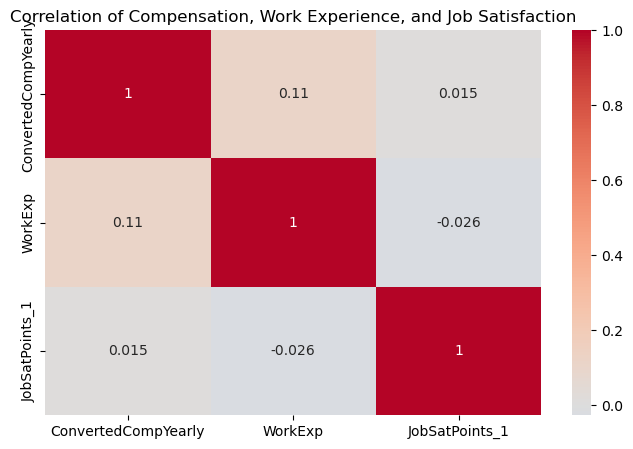

In [49]:
# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlations, 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Compensation, Work Experience, and Job Satisfaction')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


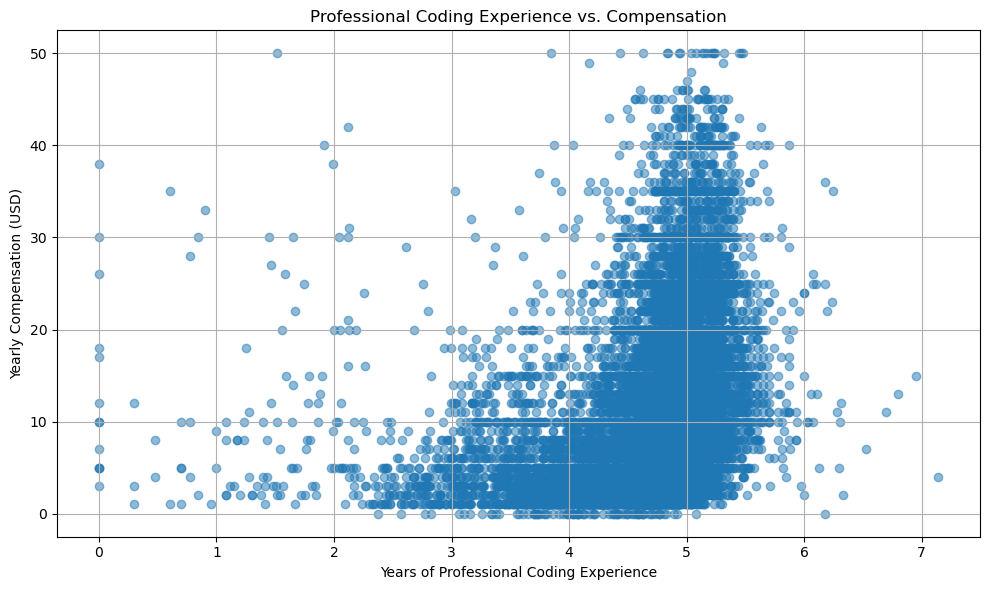

In [57]:
## Write your code here
# Loging to avoid scewness : 
df['CompTotal_log'] = No_outliers_df['ConvertedCompYearly'].apply(lambda x: np.log10(x) if x > 0 else np.nan)
# Example scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(No_outliers_df['CompTotal_log'], No_outliers_df['WorkExp'], alpha=0.5)

# Labels and title
plt.title('Professional Coding Experience vs. Compensation')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()

plt.show()

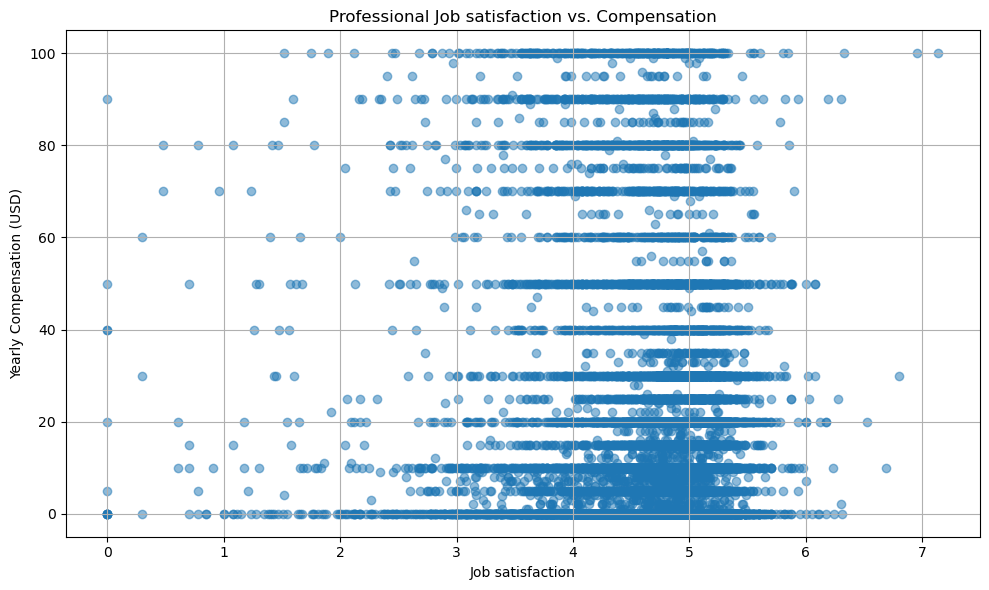

In [59]:
# Loging to avoid scewness : 
df['CompTotal_log'] = No_outliers_df['ConvertedCompYearly'].apply(lambda x: np.log10(x) if x > 0 else np.nan)
# Example scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(No_outliers_df['CompTotal_log'], No_outliers_df['JobSatPoints_1'], alpha=0.5)

# Labels and title
plt.title('Professional Job satisfaction vs. Compensation')
plt.xlabel('Job satisfaction')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()

plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
